# SNPs: Sobol sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'genetic-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

In [3]:
sample_parameters = True
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-sobol-test.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-sobol-test.csv")
len(t)

16384

In [4]:
# read data
df = pd.read_csv(output_path + "results-snp-sobol-test.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-sobol-test.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]


(16384, 13)


/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_98438/2040018633.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [5]:
params.head()

iteration  iteration_exp  replicate  init_pop fertility_type mating_type  \
0          1              1          1      8000       additive    logistic   
1         10             10          1      8000       additive    logistic   
2        100            100          1      8000       additive    logistic   
3       1000           1000          1      8000       additive    logistic   
4      10000          10000          1      8000       additive    logistic   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.156860                        0.0        0.1         0.000732   
1            0.406860                        0.0        0.1         0.246826   
2            0.188110                        0.0        0.1         0.313232   
3            0.210571                        0.0        0.1         0.864014   
4            0.114136                        0.0        0.1         0.158447   

   p_fertility_factor  
0            0.220239  
1            0.070239  
2            0.239429  
3            0.199585  
4            0.252466

In [6]:
X.describe()

p_fertility_factor  p_random_mating  p_genetic_variance
count        16384.000000     16384.000000        16384.000000
mean             0.150000         0.500000            0.250000
std              0.086605         0.288684            0.144342
min              0.000073         0.000244            0.000122
25%              0.075037         0.250122            0.125061
50%              0.150000         0.500000            0.250000
75%              0.224963         0.749878            0.374939
max              0.299927         0.999756            0.499878

## Proportion obese

                              ST   ST_conf
random-mating           0.236145  0.027126
genetic-variance        0.683795  0.062687
fertility-differential  0.325634  0.030772
                              S1   S1_conf
random-mating           0.104789  0.029863
genetic-variance        0.477558  0.056584
fertility-differential  0.186192  0.035152
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.073713  0.058844
(random-mating, fertility-differential)     0.019212  0.050697
(genetic-variance, fertility-differential)  0.088174  0.080361


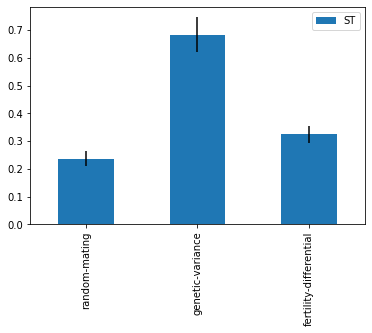

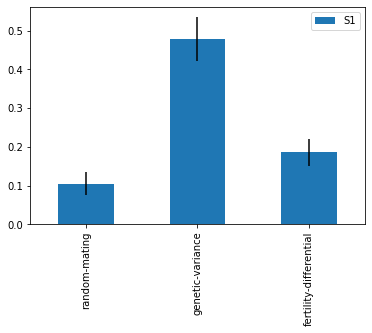

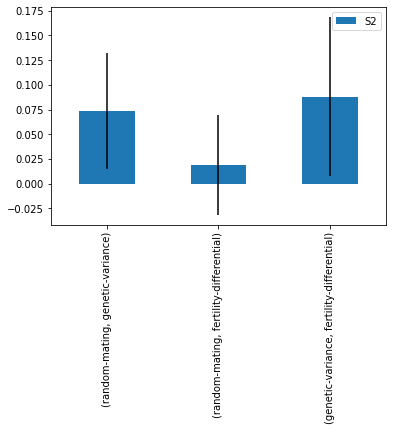

In [7]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'genes'})

sav = {
    'sb_obese_s1': sb.tabval('S1'),
    'sb_obese_s2': sb.tabval('S2'),
    'sb_obese_st': sb.tabval('ST')
}


## Average BMI

                              ST   ST_conf
random-mating           0.188476  0.020588
genetic-variance        0.661710  0.047672
fertility-differential  0.341948  0.038478
                              S1   S1_conf
random-mating           0.094750  0.026104
genetic-variance        0.502957  0.041647
fertility-differential  0.223388  0.033904
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.045568  0.048143
(random-mating, fertility-differential)     0.013775  0.043350
(genetic-variance, fertility-differential)  0.073680  0.062104


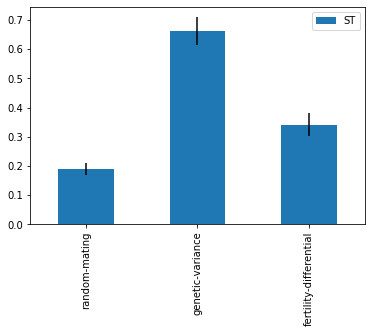

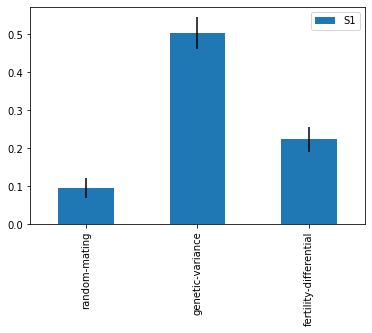

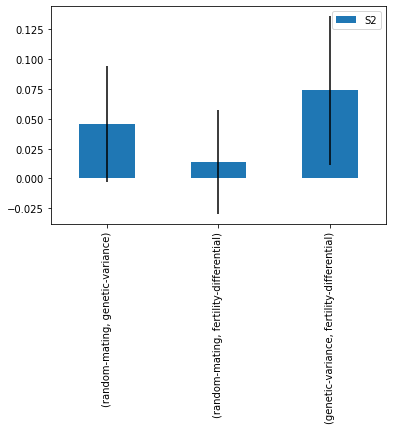

In [8]:
sb = Sensitivity(problem, df['average_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'fertility', 'z':'genes'})

sav['sb_average_s1'] =  sb.tabval('S1')
sav['sb_average_s2'] =  sb.tabval('S2')
sav['sb_average_st'] =  sb.tabval('ST')

## SD BMI

                              ST   ST_conf
random-mating           0.515910  0.056594
genetic-variance        0.767590  0.086553
fertility-differential  0.390123  0.070261
                              S1   S1_conf
random-mating           0.153295  0.048482
genetic-variance        0.375773  0.072380
fertility-differential  0.055628  0.036762
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.129054  0.089634
(random-mating, fertility-differential)     0.067411  0.103541
(genetic-variance, fertility-differential)  0.096747  0.129163


['sobol-snp.pkl']

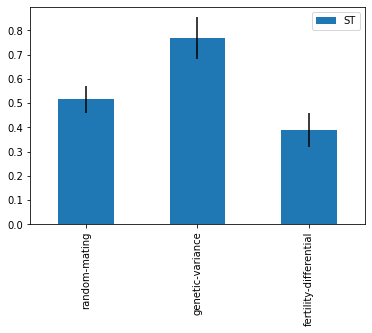

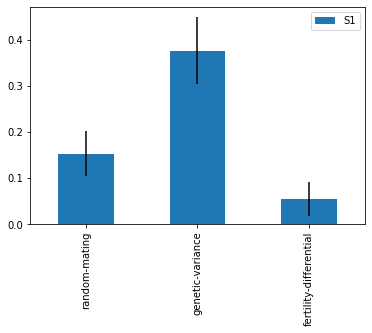

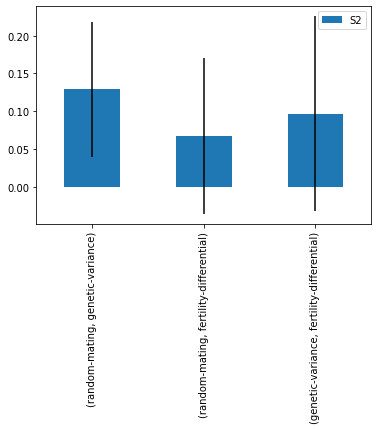

In [9]:
sb = Sensitivity(problem, df['sd_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'snp-sobol-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'fertility', 'z':'genes'})

sav['sb_sd_s1'] =  sb.tabval('S1')
sav['sb_sd_s2'] =  sb.tabval('S2')
sav['sb_sd_st'] =  sb.tabval('ST')

# save output
v = sb.createRows(sav, g=['s1', 's2', 'st'])
joblib.dump(v, 'sobol-snp.pkl')